In [1]:
import scanpy as sc
import numpy as np

In [13]:
adata = sc.read("Immune_ALL_human_wo_villani_normalized_hvg.h5ad")

In [14]:
adata.obs["final_annotation"].value_counts()

CD4+ T cells                        11011
CD14+ Monocytes                      6338
CD20+ B cells                        2873
NKT cells                            2745
NK cells                             2294
CD8+ T cells                         2183
Erythrocytes                         1502
CD16+ Monocytes                       825
Monocyte-derived dendritic cells      478
HSPCs                                 473
Erythroid progenitors                 463
Monocyte progenitors                  428
Megakaryocyte progenitors             270
Plasmacytoid dendritic cells          265
CD10+ B cells                         207
Plasma cells                          129
Name: final_annotation, dtype: int64

In [15]:
adata.obs["final_annotation"].value_counts()

CD4+ T cells                        11011
CD14+ Monocytes                      6338
CD20+ B cells                        2873
NKT cells                            2745
NK cells                             2294
CD8+ T cells                         2183
Erythrocytes                         1502
CD16+ Monocytes                       825
Monocyte-derived dendritic cells      478
HSPCs                                 473
Erythroid progenitors                 463
Monocyte progenitors                  428
Megakaryocyte progenitors             270
Plasmacytoid dendritic cells          265
CD10+ B cells                         207
Plasma cells                          129
Name: final_annotation, dtype: int64

In [16]:
order = {"run1":{"ref" : {"10X"}, "query":{"Oetjen","Sun","Freytag"},"run2":{"ref" : {"10X","Oetjen"}, "query":{"Sun","Freytag"} },
       "run3":{"ref" : {"10X","Oetjen","Sun"}, "query":{"Freytag"}},"run4":{"ref" : {"10X","Oetjen","Sun","Freytag"}}}}
         
unique_celltypes = {"10X":"CD14+ Monocytes","Freytag":"NKT cells","Oetjen":"Erythrocytes", "Sun":"CD4+ T cells" }
               

In [18]:
adata_ss = adata 

In [19]:
adata_ss.obs.groupby("final_annotation")["study"].value_counts()

final_annotation                  study  
CD4+ T cells                      Sun        4312
                                  10X        2937
                                  Oetjen     2524
                                  Freytag    1238
CD8+ T cells                      Oetjen      985
                                  Sun         578
                                  10X         350
                                  Freytag     270
CD10+ B cells                     Oetjen      207
CD14+ Monocytes                   10X        3388
                                  Sun        1501
                                  Oetjen      997
                                  Freytag     452
CD16+ Monocytes                   10X         364
                                  Sun         271
                                  Oetjen      165
                                  Freytag      25
CD20+ B cells                     10X        1546
                                  Oetjen      491
        

#### Rare pdc task

In [222]:
adata_ss_pdc = adata_ss[~(adata_ss.obs["study"].isin(["10X","Oetjen","Freytag"])&
                        adata_ss.obs["final_annotation"].isin(["Plasmacytoid dendritic cells"]))]

/Users/mohammad.lotfollahi/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [223]:
adata_ss_pdc.obs.groupby("final_annotation")["study"].value_counts()

final_annotation                  study  
CD4+ T cells                      Sun        4312
                                  10X        2937
                                  Oetjen     2524
                                  Freytag    1238
CD8+ T cells                      Oetjen      985
                                  Sun         578
                                  10X         350
                                  Freytag     270
CD10+ B cells                     Oetjen      207
CD14+ Monocytes                   10X        3388
                                  Sun        1501
                                  Oetjen      997
                                  Freytag     452
CD16+ Monocytes                   10X         364
                                  Sun         271
                                  Oetjen      165
                                  Freytag      25
CD20+ B cells                     10X        1546
                                  Oetjen      491
        

In [224]:
adata_ss_pdc.write("./rare_pdc_pbmc.h5ad")

#### Rare systematic calculation

In [37]:
CD16_mono = adata_ss[adata_ss.obs["final_annotation"]== "CD16+ Monocytes"]
other = adata_ss[adata_ss.obs["final_annotation"]!= "CD16+ Monocytes"]
adata_list = []
adata_dict = {}
frac_list = [10,30,50,70,100]
for fraction in frac_list:
    for study in CD16_mono.obs["study"].unique(): 
        study_temp = CD16_mono[CD16_mono.obs["study"] == study]
        if len(study_temp)< fraction:
            fract = len(study_temp) 
        else:
            fract = fraction
        adata_list.append(sc.pp.subsample(study_temp, n_obs=fract,copy=True))
    adata_CD16_subsample = other.concatenate(*adata_list,batch_key="concat")
#     adata_dict[fract] = sc.AnnData.concatenate(*adata_list,batch_key="concat")
    adata_dict[fract] = adata_CD16_subsample
    adata_list = []

In [38]:
 adata_dict.keys()

dict_keys([10, 30, 50, 70, 100])

In [39]:
for i in adata_dict.keys():
    len_i = len(adata_dict[i][adata_dict[i].obs["final_annotation"]== "CD16+ Monocytes"])
    print(len_i/len(adata_dict[i]))

0.001261869459604404
0.0036193113866683454
0.005497267072940881
0.007368157020129178
0.010161330665332667


In [40]:
for i in adata_dict.keys():
    len_i = len(adata_dict[i][adata_dict[i].obs["final_annotation"]== "CD16+ Monocytes"])
    percentage = len_i/len(adata_dict[i])
    adata_dict[i].write(f"./pbmc_rare/pbmc_rare_{percentage:1f}.h5ad")

... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'final_annotation' as categorical
... storing 'sample_ID' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical
... storing 'condition' as categorical
... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'final_annotation' as categorical
... storing 'sample_ID' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical
... storing 'condition' as categorical
... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'final_annotation' as categorical
... storing 'sample_ID' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical
... storing 'condition' as categorical
... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'final_annotation' as categorical
... storing 'sample_ID' as categorical
... storing 'study' as categorical

In [7]:
adata_10 = sc.read("./pbmc_rare/pbmc_rare_20.h5ad")

In [10]:
adata_10.obs["final_annotation"].value_counts()

CD4+ T cells                        11011
CD14+ Monocytes                      6338
CD20+ B cells                        2873
NKT cells                            2745
NK cells                             2294
CD8+ T cells                         2183
Erythrocytes                         1502
Monocyte-derived dendritic cells      478
HSPCs                                 473
Erythroid progenitors                 463
Monocyte progenitors                  428
Megakaryocyte progenitors             270
Plasmacytoid dendritic cells          265
CD10+ B cells                         207
Plasma cells                          129
CD16+ Monocytes                        80
Name: final_annotation, dtype: int64

In [203]:
sc.pp.neighbors(adata_dict[50])
sc.tl.umap(adata_dict[50])

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/mohammad.lotfollahi/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'final_annotation' as categorical
... storing 'sample_ID' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical
... storing 'condition' as categorical


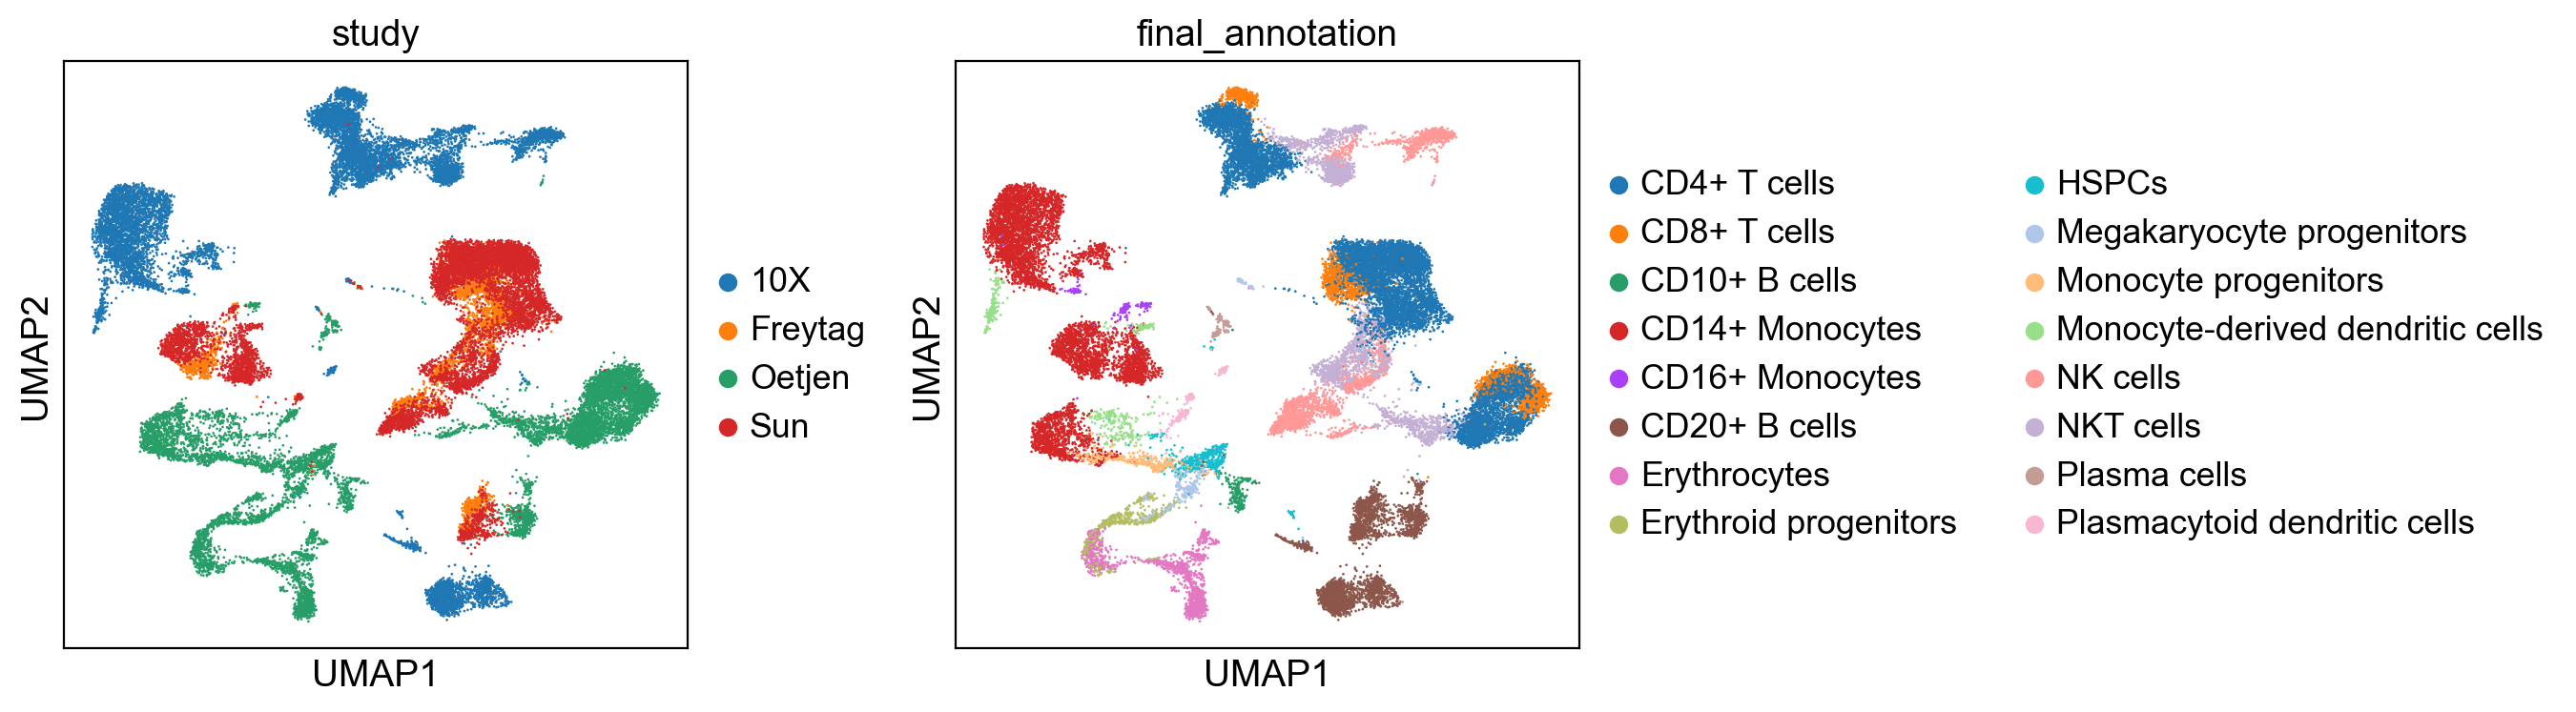

In [204]:
sc.pl.umap(adata_dict[50], color=["study", "final_annotation"], wspace=0.3)